[1 0 0]


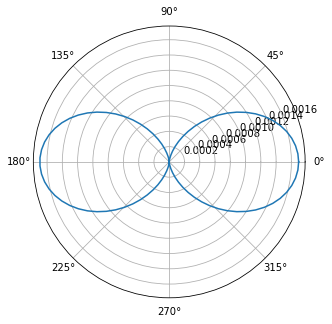

In [20]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numpy import sin, cos
'''
Эта программа по параметрам трещины (strike и dip углам)
считает распространение p волны в породе
'''
vp = 4     # скорость первичной волны
rho = 1     # плотность среды
G = 1       # модуль свдига среды
AF = 1      # площадь трещины
shift = np.array([1, 0, 0])   # вектор смещения (d)
# углы, задающие направление трещины (strike относительно севера(оси x))
strike, dip = -0/180*np.pi, 90/180*np.pi
# teta = 0    # угол поворота осей по вертикали
n = np.array([
    -sin(dip)*cos(strike), 
    sin(dip)*sin(strike), 
    -cos(dip)
])     # вектор нормали к трещине
# shift = n[[0, 1, 2]] + n[[1, 0, 2]]
print(shift)
M = np.expand_dims(shift, 0) * np.expand_dims(n, 1) +\
    np.expand_dims(shift, 1) * np.expand_dims(n, 0)
M *= AF*G
# тензор моментов сил

def f(t):   # форма импульса
    if 0 < t <np.pi:
        return np.sin(t)
    return 0
def deriv_f(t):
    '''характерное время pi'''
    return f(t) # временное решение, чтобы не делать разрывный косинус

# x = np.linspace(-5, 10, 150)
# y = [f(x) for x in x]
# plt.plot(x, y)
# plt.show()

def u(R, t):       # вектор смещения в разных точках
    R = np.array(R)
    r = norm(R)
    gamma = R / r
    ampl = np.sum( gamma*np.expand_dims(gamma, 1) / (4 * np.pi * rho * vp ** 3 * r) * M)
    ampl = 2*np.sum(gamma*n)*np.sum(gamma*shift) / (4 * np.pi * rho * vp ** 3 * r) 
    result = ampl*gamma*deriv_f(t-r/vp) # вектор смещения
    return result

plt.figure(figsize=(5,5))
# X, Y = np.linspace(-100, 100, 30), np.linspace(-100, 100, 30)
# field = (np.array([[u([x, y, 0])[:2] if np.sqrt(x*x+y*y) > 50 else [0, 0] for x in X] for y in Y] ))
# # plt.pcolormesh(np.sqrt(np.sum(field*field, -1)))
# # plt.colorbar()
# plt.quiver(*np.meshgrid(X, Y), field[:, :, 0], field[:, :, 1])
# plt.show()

angle = np.linspace(0, 2*np.pi, 100)
ampl = np.array([norm(u([cos(a), sin(a), 0], 1)) for a in angle])
plt.polar(angle, ampl)
plt.show()



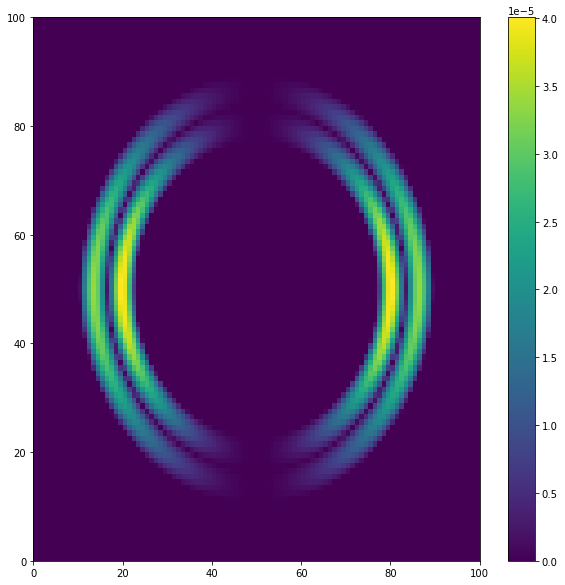

In [22]:
plt.figure(figsize=(10,10))
t = 20
X, Y = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
field = (np.array([[u([x, y, 0], t)[:2] if np.sqrt(x*x+y*y) > 10 else [0, 0] for x in X] for y in Y] ))
plt.pcolormesh(np.sqrt(np.sum(field*field, -1)))
plt.colorbar()
# plt.quiver(*np.meshgrid(X, Y), field[:, :, 0], field[:, :, 1])
# plt.show()

<Figure size 864x1152 with 0 Axes>

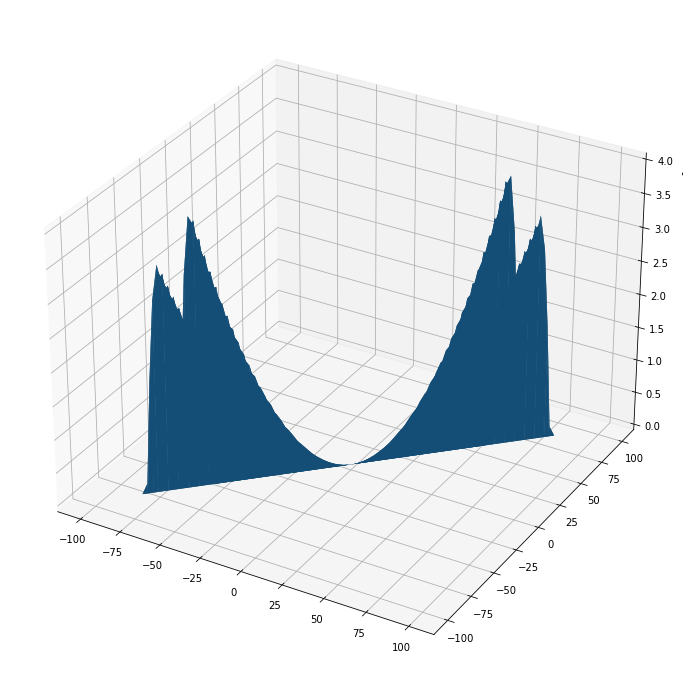

In [32]:
plt.figure(figsize=(12,16))
t = 20
X, Y = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
field = (np.array([[norm(u([x, y, 0], t)[0:2]) if np.sqrt(x*x+y*y) > 10 else 0 for x in X] for y in Y] ))

fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, field)

# plt.pcolormesh(np.sqrt(np.sum(field*field, -1)))
# plt.colorbar()

In [24]:
field.shape

(100, 100, 2)